#**Unsupervised Learning Assignment**

In this Jupyter Notebook, you can find the code that I've used to create the dendrograms and to calculate the optimal number of clusters. The notebook is divided in 2 parts: the first one where I load and process all the data and the second part where I calculate all the things that you required us.

First of all, let's import all the functions that we need to work with:

In [1]:
import pandas as pd # To work with dataframes
import numpy as np # To work with arrays
import seaborn as sns # To make scatterplot
from scipy.cluster import hierarchy # To make hierarchical clustering
from scipy.cluster.hierarchy import dendrogram # To make the dendograms
from sklearn.cluster import KMeans # KMeans function
from sklearn.metrics import silhouette_score # To choose the best parameter K
import matplotlib.pyplot as plt # To plot dendograms and elbow plots
from yellowbrick.cluster import SilhouetteVisualizer # To plot Silouhette score

## **Data management**

To do our job, first we need to load our data and prepare it.

In [2]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/nci_var_filtered.csv', header = 'infer', sep = '\t')
df.head(5)

,gene,786-0,A498,A549,ACHN,BT-549,CAKI-1,CCRF-CEM,COLO205,DU-145,EKVX,HCC-2998,HCT-116,HCT-15,HL-60,HOP-62,HOP-92,HS-578T,HT29,IGR-OV1,K-562,KM12,LOX-IMVI,M14,MALME-3M,MCF7,MDA-MB-231,MDA-MB-435,MDA-MB-468,MOLT-4,NCI-ADR-RES,NCI-H226,NCI-H23,NCI-H322M,NCI-H460,NCI-H522,OVCAR-3,OVCAR-4,OVCAR-5,OVCAR-8,PC-3,RPMI-8226,RXF-393,SF-268,SF-295,SF-539,SK-MEL-2,SK-MEL-28,SK-MEL-5,SK-OV-3,SN12C,SNB-19,SNB-75,SR,SW-620,T-47D,TK-10,U251,UACC-257,UACC-62,UO-31
0,A1BG,-1.025477,-0.925477,0.274523,-0.875477,2.484523,1.244523,1.914523,-1.025477,0.584523,0.094523,-0.795477,-0.915477,-0.955477,-0.625477,0.584523,1.394523,2.754523,-0.965477,0.604523,0.564523,-0.845477,-1.025477,0.684523,1.984523,1.594523,0.414523,1.154523,0.684523,1.644523,0.834523,0.124523,0.324523,1.414523,-0.005477,1.524523,0.914523,-0.035477,-1.015477,0.514523,-0.905477,-0.165477,1.014523,0.814523,1.424523,1.244523,1.554523,1.414523,1.114523,1.754523,2.074523,0.494523,-0.705477,0.914523,-0.885477,1.524523,-0.995477,0.314523,1.774523,2.104523,-0.665477
1,A2M,-1.409323,-1.409323,-1.409323,-1.409323,-1.409323,-1.399323,-1.299323,-1.409323,-1.399323,0.100677,-1.349323,-1.289323,-1.409323,-1.349323,-1.409323,-1.409323,-1.409323,-1.399323,-1.409323,-1.379323,-1.379323,-1.379323,2.260677,5.510677,-1.369323,-1.269323,-1.269323,2.380677,-1.399323,-1.399323,-0.379323,0.240677,-1.159323,-1.339323,-1.309323,-1.369323,-1.369323,-1.209323,-1.349323,-1.289323,-1.409323,-1.329323,-1.409323,-1.289323,0.250677,4.310677,6.570677,6.620677,-1.379323,-1.369323,-0.889323,-0.729323,-1.409323,-1.229323,-1.399323,-1.399323,-1.369323,5.630677,3.280677,-1.399323
2,A2ML1,-1.696062,-1.686062,-1.686062,-1.686062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.586062,-1.616062,-1.696062,-1.696062,-1.696062,-1.696062,-1.686062,-1.696062,-1.696062,-1.686062,-1.686062,1.733938,-1.626062,-1.686062,-1.616062,-1.696062,-1.696062,-1.636062,-1.296062,-1.696062,-1.696062,-1.696062,-1.686062,0.023938,-1.696062,-1.696062,-1.446062,-1.556062,-1.446062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.686062,-1.546062,-1.506062,-1.546062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.636062,-1.696062,-1.696062,-1.686062,-1.586062,-1.696062
3,A4GALT,1.978677,1.588677,0.908677,0.348677,1.098677,1.488677,-1.791323,-1.041323,-0.601323,1.498677,0.778677,0.968677,-1.591323,-2.241323,-0.081323,1.208677,-1.581323,0.278677,2.368677,-2.201323,-1.361323,-2.241323,-2.201323,0.258677,1.238677,1.508677,-2.241323,-0.241323,-2.241323,0.158677,-1.841323,0.498677,3.008677,0.238677,-0.561323,-0.721323,1.468677,0.168677,0.048677,-1.731323,-1.661323,2.668677,-1.131323,-1.081323,-0.511323,2.718677,0.778677,-2.241323,2.278677,-0.051323,0.008677,2.308677,-2.241323,-1.101323,0.668677,-0.181323,-0.131323,-2.241323,-1.581323,1.368677
4,AAAS,0.878385,0.178385,1.658385,-0.291615,-0.011615,0.568385,1.518385,0.148385,0.158385,1.038385,-0.441615,1.348385,-0.781615,0.858385,-0.401615,0.958385,-0.411615,-1.071615,0.308385,1.688385,-0.871615,0.488385,1.688385,1.118385,0.018385,-0.101615,0.858385,-0.711615,0.898385,1.168385,0.848385,1.088385,0.568385,0.818385,-0.241615,1.158385,0.848385,1.108385,1.118385,0.878385,1.328385,0.628385,1.018385,1.068385,0.178385,1.408385,0.868385,1.148385,1.488385,0.098385,-0.041615,0.638385,0.608385,1.968385,1.218385,0.098385,0.238385,0.778385,0.558385,0.508385


Set the gene name as the index of our dataframe.

In [3]:
df = df.set_index('gene')
df.head(5)

,786-0,A498,A549,ACHN,BT-549,CAKI-1,CCRF-CEM,COLO205,DU-145,EKVX,HCC-2998,HCT-116,HCT-15,HL-60,HOP-62,HOP-92,HS-578T,HT29,IGR-OV1,K-562,KM12,LOX-IMVI,M14,MALME-3M,MCF7,MDA-MB-231,MDA-MB-435,MDA-MB-468,MOLT-4,NCI-ADR-RES,NCI-H226,NCI-H23,NCI-H322M,NCI-H460,NCI-H522,OVCAR-3,OVCAR-4,OVCAR-5,OVCAR-8,PC-3,RPMI-8226,RXF-393,SF-268,SF-295,SF-539,SK-MEL-2,SK-MEL-28,SK-MEL-5,SK-OV-3,SN12C,SNB-19,SNB-75,SR,SW-620,T-47D,TK-10,U251,UACC-257,UACC-62,UO-31
gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1BG,-1.025477,-0.925477,0.274523,-0.875477,2.484523,1.244523,1.914523,-1.025477,0.584523,0.094523,-0.795477,-0.915477,-0.955477,-0.625477,0.584523,1.394523,2.754523,-0.965477,0.604523,0.564523,-0.845477,-1.025477,0.684523,1.984523,1.594523,0.414523,1.154523,0.684523,1.644523,0.834523,0.124523,0.324523,1.414523,-0.005477,1.524523,0.914523,-0.035477,-1.015477,0.514523,-0.905477,-0.165477,1.014523,0.814523,1.424523,1.244523,1.554523,1.414523,1.114523,1.754523,2.074523,0.494523,-0.705477,0.914523,-0.885477,1.524523,-0.995477,0.314523,1.774523,2.104523,-0.665477
A2M,-1.409323,-1.409323,-1.409323,-1.409323,-1.409323,-1.399323,-1.299323,-1.409323,-1.399323,0.100677,-1.349323,-1.289323,-1.409323,-1.349323,-1.409323,-1.409323,-1.409323,-1.399323,-1.409323,-1.379323,-1.379323,-1.379323,2.260677,5.510677,-1.369323,-1.269323,-1.269323,2.380677,-1.399323,-1.399323,-0.379323,0.240677,-1.159323,-1.339323,-1.309323,-1.369323,-1.369323,-1.209323,-1.349323,-1.289323,-1.409323,-1.329323,-1.409323,-1.289323,0.250677,4.310677,6.570677,6.620677,-1.379323,-1.369323,-0.889323,-0.729323,-1.409323,-1.229323,-1.399323,-1.399323,-1.369323,5.630677,3.280677,-1.399323
A2ML1,-1.696062,-1.686062,-1.686062,-1.686062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.586062,-1.616062,-1.696062,-1.696062,-1.696062,-1.696062,-1.686062,-1.696062,-1.696062,-1.686062,-1.686062,1.733938,-1.626062,-1.686062,-1.616062,-1.696062,-1.696062,-1.636062,-1.296062,-1.696062,-1.696062,-1.696062,-1.686062,0.023938,-1.696062,-1.696062,-1.446062,-1.556062,-1.446062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.686062,-1.546062,-1.506062,-1.546062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.636062,-1.696062,-1.696062,-1.686062,-1.586062,-1.696062
A4GALT,1.978677,1.588677,0.908677,0.348677,1.098677,1.488677,-1.791323,-1.041323,-0.601323,1.498677,0.778677,0.968677,-1.591323,-2.241323,-0.081323,1.208677,-1.581323,0.278677,2.368677,-2.201323,-1.361323,-2.241323,-2.201323,0.258677,1.238677,1.508677,-2.241323,-0.241323,-2.241323,0.158677,-1.841323,0.498677,3.008677,0.238677,-0.561323,-0.721323,1.468677,0.168677,0.048677,-1.731323,-1.661323,2.668677,-1.131323,-1.081323,-0.511323,2.718677,0.778677,-2.241323,2.278677,-0.051323,0.008677,2.308677,-2.241323,-1.101323,0.668677,-0.181323,-0.131323,-2.241323,-1.581323,1.368677
AAAS,0.878385,0.178385,1.658385,-0.291615,-0.011615,0.568385,1.518385,0.148385,0.158385,1.038385,-0.441615,1.348385,-0.781615,0.858385,-0.401615,0.958385,-0.411615,-1.071615,0.308385,1.688385,-0.871615,0.488385,1.688385,1.118385,0.018385,-0.101615,0.858385,-0.711615,0.898385,1.168385,0.848385,1.088385,0.568385,0.818385,-0.241615,1.158385,0.848385,1.108385,1.118385,0.878385,1.328385,0.628385,1.018385,1.068385,0.178385,1.408385,0.868385,1.148385,1.488385,0.098385,-0.041615,0.638385,0.608385,1.968385,1.218385,0.098385,0.238385,0.778385,0.558385,0.508385


And then, we can retrieve all the cell lines and store them into a list.

In [4]:
cell_lines = list(df.columns.values)
cell_lines[1:8]

['A498', 'A549', 'ACHN', 'BT-549', 'CAKI-1', 'CCRF-CEM', 'COLO205']

To work with cluster models we need to transpose our data, because it uses the rows.

In [5]:
df_t= df.transpose()
df_t.head(5)

gene,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AAED1,AAGAB,AAMP,AAR2,AARS,AARS2,AASDH,AASDHPPT,AATK,ABAT,ABCA2,ABCA3,ABCA6,ABCA7,ABCA8,ABCA9,ABCB10,ABCB11,ABCB8,ABCC1,ABCC10,ABCC11,ABCC5,ABCC6,ABCC8,ABCD1,ABCD3,ABCD4,ABCE1,ABCF1,ABCF2,ABCF3,ABCG4,...,ZNF99,ZNFX1,ZNHIT1,ZNHIT6,ZNRD1,ZNRF2,ZNRF4,ZP1,ZP2,ZP4,ZRANB1,ZRANB2,ZSCAN1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN2,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN25,ZSCAN26,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN4,ZSCAN9,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM7,ZSWIM8,ZUFSP,ZW10,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11B,ZZZ3
786-0,-1.025477,-1.409323,-1.696062,1.978677,0.878385,-0.354923,-0.809323,1.419631,0.369015,-0.128523,0.043877,0.603108,0.741938,-0.170415,1.164492,-0.333662,-1.599538,0.974554,1.113231,-0.505369,-0.438,-0.446723,-0.252831,-0.521846,-0.203754,0.647923,0.058354,-0.0572,-0.281477,-1.025215,-0.581538,-0.227877,0.374277,0.607862,0.211785,0.511046,1.282877,1.041969,0.356646,-0.0932,...,-0.0454,0.996477,-0.148385,1.189677,-0.5214,-0.560431,-0.005215,0.517415,-0.075554,-0.029985,-0.041369,1.0474,-0.106554,0.937908,-0.333785,0.879354,0.410138,-0.024492,0.102277,-0.195292,0.307738,-0.141754,-0.007338,-0.090585,-0.508862,-0.088231,0.211123,-0.041738,-0.967369,0.632138,0.266154,0.002246,0.482123,0.605908,2.007554,-0.359754,-0.193538,-0.565677,-0.243108,0.456292
A498,-0.925477,-1.409323,-1.686062,1.588677,0.178385,-0.184923,-0.389323,1.779631,0.249015,-0.198523,-0.386123,-0.136892,0.701938,-0.570415,0.804492,-0.323662,-1.379538,1.214554,1.923231,-0.445369,0.832,-0.446723,-0.252831,0.628154,-0.203754,0.777923,1.138354,-0.3572,-0.291477,-0.535215,0.238462,-0.227877,1.114277,0.357862,-0.378215,0.441046,0.392877,1.101969,-0.013354,-0.1632,...,-0.1054,0.626477,1.251615,0.189677,-0.7914,-0.240431,-0.005215,1.207415,-0.075554,-0.029985,-0.881369,0.7974,-0.106554,-1.242092,-0.653785,0.069354,-0.359862,-0.004492,-0.377723,-0.115292,0.467738,-0.181754,0.072662,-0.430585,0.461138,-0.088231,-0.098877,-0.051738,-0.407369,1.272138,0.106154,0.042246,0.092123,-0.384092,1.227554,0.770246,0.386462,-0.705677,-0.233108,-0.113708
A549,0.274523,-1.409323,-1.686062,0.908677,1.658385,-0.074923,0.880677,0.809631,0.649015,0.381477,0.243877,1.373108,0.131938,-0.410415,0.984492,-0.333662,-1.849538,0.574554,1.963231,-0.505369,-0.108,-0.416723,-0.252831,0.908154,-0.163754,0.547923,2.258354,-0.5472,-0.271477,-1.535215,-0.701538,0.562123,-1.215723,0.687862,-0.328215,0.991046,1.012877,1.271969,-0.043354,-0.1332,...,-0.1054,-0.003523,-0.598385,0.359677,-0.4114,-0.620431,-0.005215,-0.202585,-0.075554,-0.029985,-0.321369,-0.2726,-0.106554,0.287908,-0.233785,-0.900646,0.880138,-0.254492,0.542277,0.014708,0.167738,-0.541754,0.012662,-1.410585,-0.978862,-0.088231,-0.308877,0.178262,-0.887369,0.142138,0.366154,-0.627754,-0.047877,0.405908,2.227554,0.040246,0.616462,-0.775677,-0.243108,-0.433708
ACHN,-0.875477,-1.409323,-1.686062,0.348677,-0.291615,-0.014923,-0.809323,1.179631,-0.500985,-1.038523,-1.556123,0.373108,-0.298062,-0.180415,0.504492,-0.323662,-1.769538,-0.455446,1.743231,-0.505369,-0.858,-0.446723,-0.222831,-0.261846,-0.203754,0.087923,0.488354,-0.5072,-0.211477,-0.625215,1.098462,-0.227877,-1.575723,-0.592138,-0.018215,0.191046,-0.587123,-0.198031,-1.413354,-0.1632,...,-0.0954,-0.633523,1.081615,0.299677,-0.6114,-0.680431,-0.005215,-0.202585,-0.075554,-0.029985,-0.901369,0.2874,-0.106554,0.307908,-0.133785,-0.940646,-0.629862,-0.254492,-0.427723,-0.345292,0.427738,-0.851754,-0.197338,0.199415,-1.218862,-0.088231,-0.098877,-1.321738,-0.837369,-0.757862,0.266154,0.092246,0.192123,-0.854092,0.947554,-0.259754,-0.533538,-1.125677,-1.633108,-0.203708
BT-549,2.484523,-1.409323,-1.696062,1.098677,-0.011615,-2.114923,-0.809323,1.379631,-0.630985,-1.168523,-0.376123,0.893108,-0.128062,-0.260415,0.744492,-0.333662,-1.939538,-1.265446,3.053231,-0.355369,0.202,-0.376723,-0.152831,-0.311846,-0.203754,-0.252077,-0.371646,0.1728,-0.291477,-0.975215,-1.331538,-0.227877,0.604277,-0.142138,-1.098215,0.391046,1.222877,0.521969,-0.843354,-0.1532,...,0.1446,0.606477,0.291615,0.939677,

## **Hierarchical Clustering**

It is a method that classifies the classes into different hierarchical clusters. In our case of study, it will group genes in different groups based on their similarity.


[*In all of the hierarchical studies I set *optimal_ordering = True* *because it will take the minimal distance between successive leaves and the classification will be more accurate*]

### Single method with different metrics

The single method is the most famous and oldest of all, also known as the nearest neighbour method, where the distance between two groups is the distance defined between the two nearest members of these groups.

Text(0.5, 0, 'Cell lines')

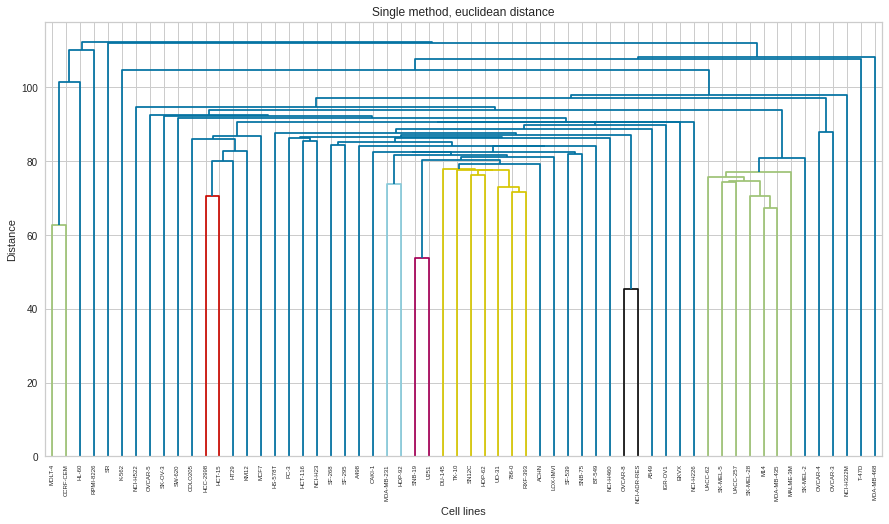

In [6]:
cluster = hierarchy.linkage(df_t, method='single', metric='euclidean', optimal_ordering=True)
# Dendrogram plotting using linkage matrix
plt.figure(figsize=(15,8))
dendrogram = hierarchy.dendrogram(cluster, labels = cell_lines)
plt.title("Single method, euclidean distance")
plt.ylabel("Distance")
plt.xlabel('Cell lines')

Text(0.5, 0, 'Cell lines')

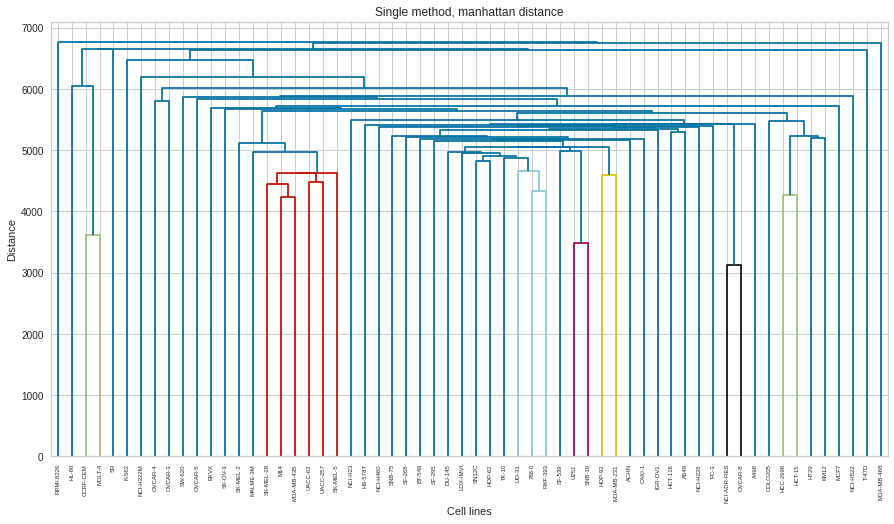

In [18]:
cluster = hierarchy.linkage(df_t, method='single', metric='cityblock', optimal_ordering=True)
# Dendrogram plotting using linkage matrix
plt.figure(figsize=(15,8))
dendrogram = hierarchy.dendrogram(cluster, labels = cell_lines)
plt.title("Single method, manhattan distance")
plt.ylabel("Distance")
plt.xlabel('Cell lines')

Text(0.5, 0, 'Cell Lines')

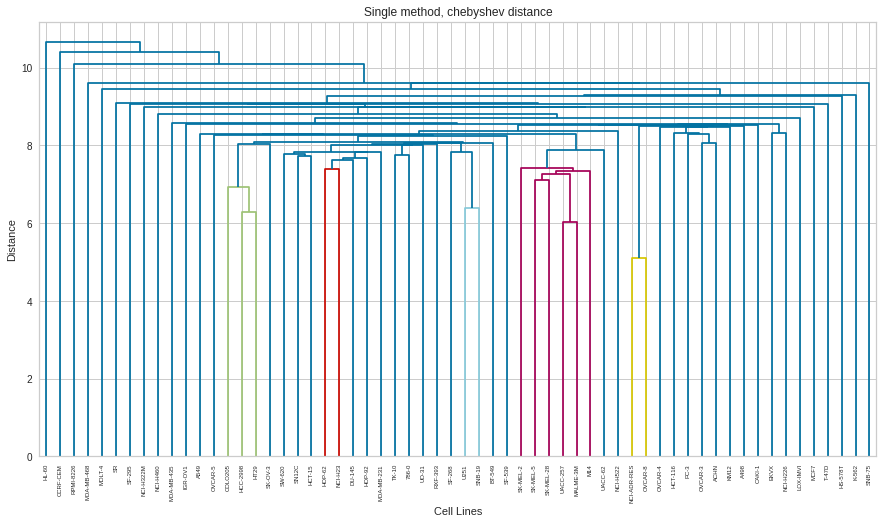

In [7]:
cluster = hierarchy.linkage(df_t, method='single', metric='chebyshev', optimal_ordering=True)
# Dendrogram plotting using linkage matrix
plt.figure(figsize=(15,8))
dendrogram = hierarchy.dendrogram(cluster, labels = cell_lines)
plt.title("Single method, chebyshev distance")
plt.ylabel("Distance")
plt.xlabel('Cell Lines')

Text(0.5, 0, 'Cell lines')

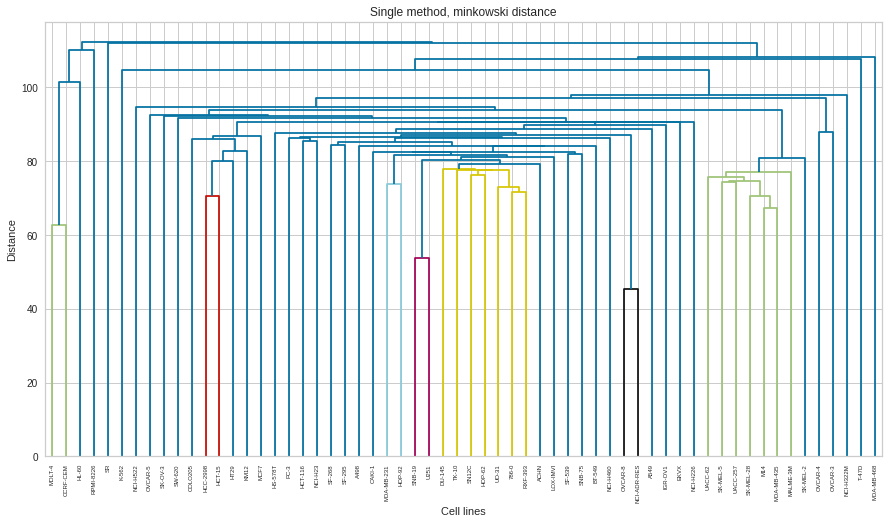

In [8]:
cluster = hierarchy.linkage(df_t, method='single', metric='minkowski', optimal_ordering=True)
# Dendrogram plotting using linkage matrix
plt.figure(figsize=(15,8))
dendrogram = hierarchy.dendrogram(cluster, labels = cell_lines)
plt.title("Single method, minkowski distance")
plt.ylabel("Distance")
plt.xlabel('Cell lines')

Most of the genes are classify as the same group (blue color), while the other ones are highly distributed in different groups (green, orange, purple...) that are smaller ones (most of them are just compound by 2 members).

Because of we are taking the minimal distance between two points of the two groups, it makes sense that most of the genes are grouped in the same group.

### Complete method with different metrics

The complete method sorts in the opposite way to the previous method, choosing those members of two groups that are farthest apart. Because of this, it makes the clusters formed compact and well separated from each other.

Text(0.5, 0, 'Cell lines')

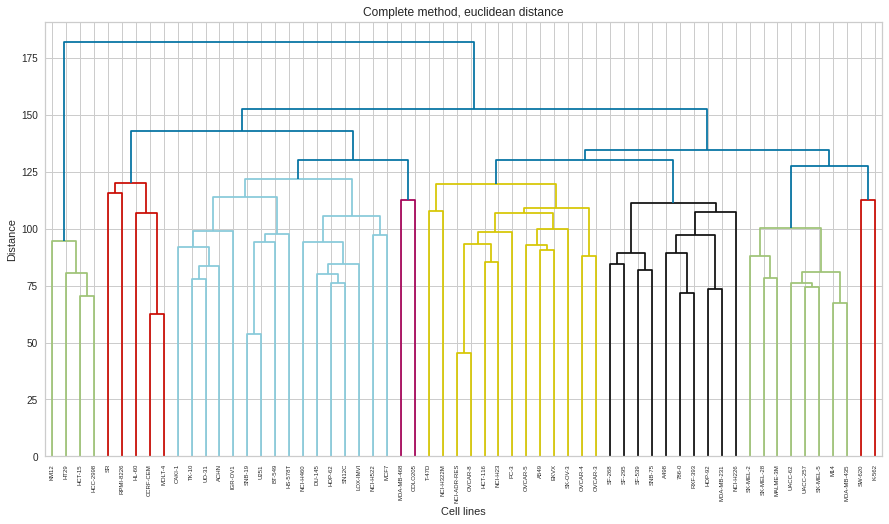

In [9]:
cluster = hierarchy.linkage(df_t, method='complete', metric='euclidean', optimal_ordering=True)
# Dendrogram plotting using linkage matrix
plt.figure(figsize=(15,8))
dendrogram = hierarchy.dendrogram(cluster, labels = cell_lines)
plt.title("Complete method, euclidean distance")
plt.ylabel("Distance")
plt.xlabel('Cell lines')

Text(0.5, 0, 'Cell lines')

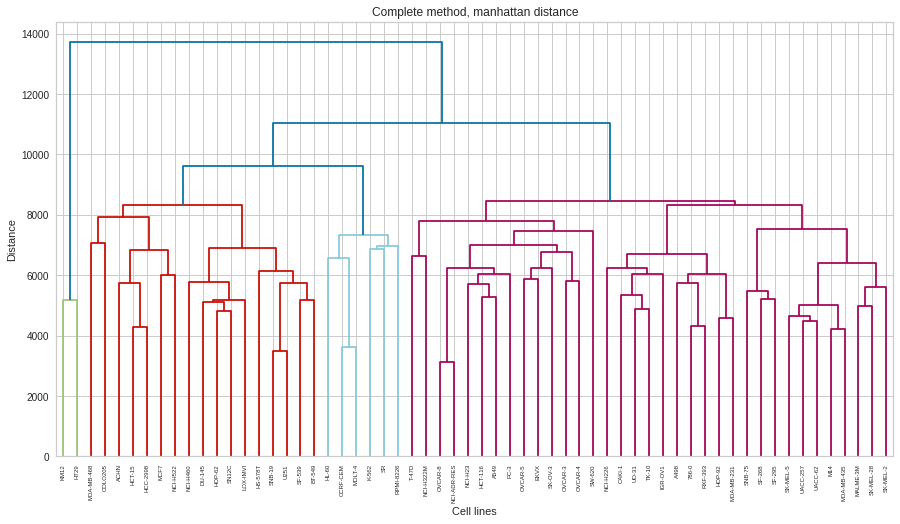

In [20]:
cluster = hierarchy.linkage(df_t, method='complete', metric='cityblock', optimal_ordering=True)
# Dendrogram plotting using linkage matrix
plt.figure(figsize=(15,8))
dendrogram = hierarchy.dendrogram(cluster, labels = cell_lines)
plt.title("Complete method, manhattan distance")
plt.ylabel("Distance")
plt.xlabel('Cell lines')

Text(0.5, 0, 'Cell lines')

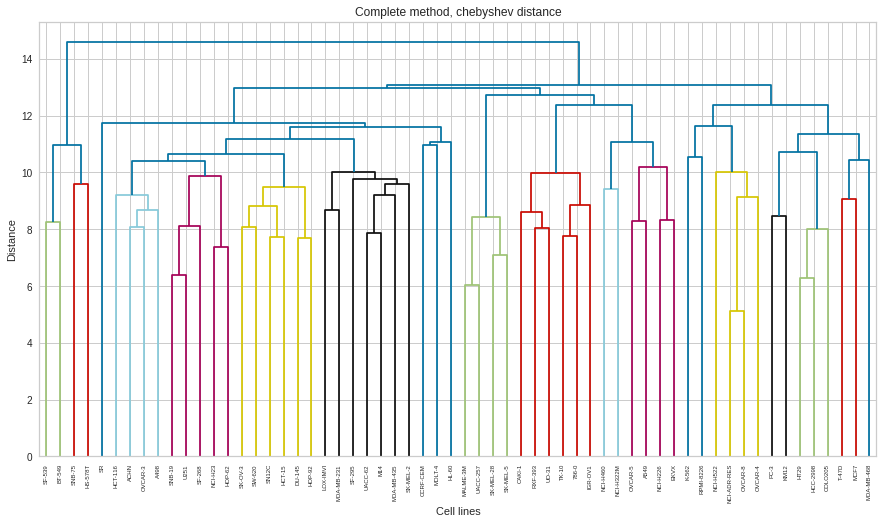

In [10]:
cluster = hierarchy.linkage(df_t, method='complete', metric='chebyshev', optimal_ordering=True)
# Dendrogram plotting using linkage matrix
plt.figure(figsize=(15,8))
dendrogram = hierarchy.dendrogram(cluster, labels = cell_lines)
plt.title("Complete method, chebyshev distance")
plt.ylabel("Distance")
plt.xlabel('Cell lines')

Text(0.5, 0, 'Cell lines')

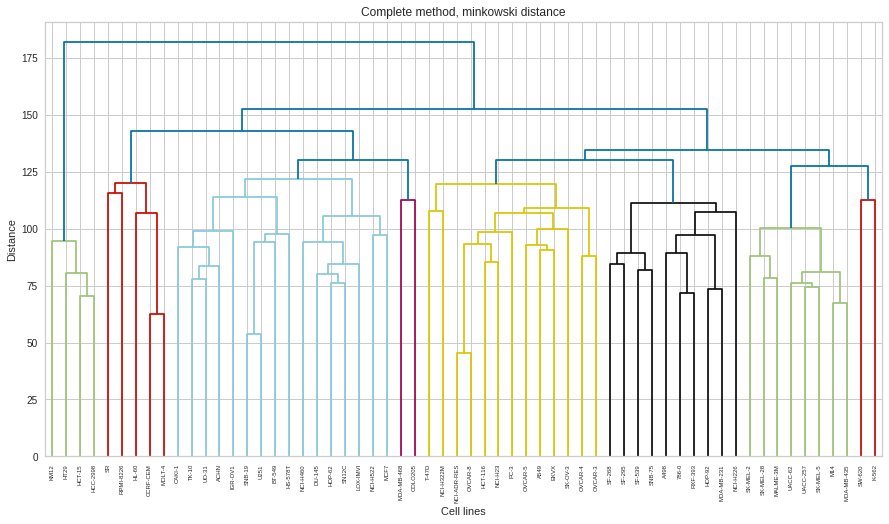

In [11]:
cluster = hierarchy.linkage(df_t, method='complete', metric='minkowski', optimal_ordering=True)
# Dendrogram plotting using linkage matrix
plt.figure(figsize=(15,8))
dendrogram = hierarchy.dendrogram(cluster, labels = cell_lines)
plt.title("Complete method, minkowski distance")
plt.ylabel("Distance")
plt.xlabel('Cell lines')

In contrast with the single method, the complete method set more groups between the different genes, being this classification more heterogeneus.

This makes sense because when you are grouping by farthest distance, the number of groups are higher because there are less similarity.

### Average method with different metrics

The average method classifies clusters according to the distance between the centroids of each group (i.e. the most representative point of each group). This ranking method can introduce classifications that are difficult to interpret due to the fact that the merging of new clusters occurs at different levels.

Text(0.5, 0, 'Cell lines')

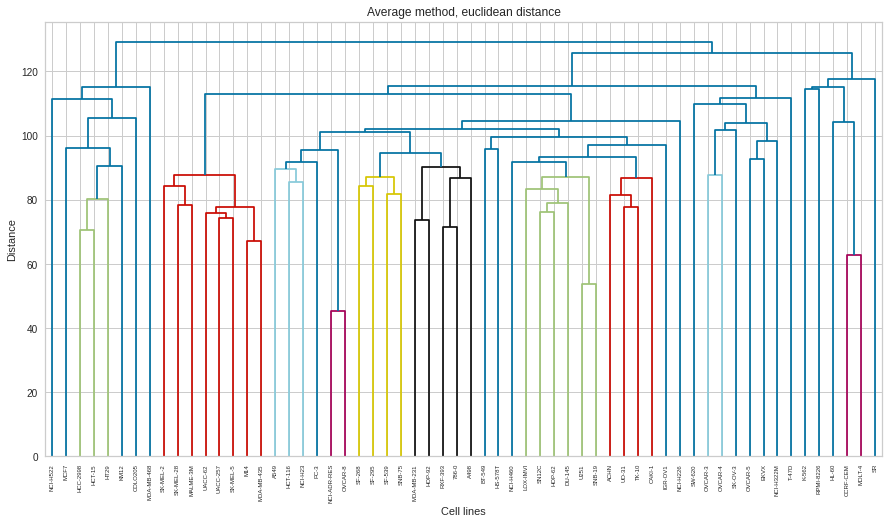

In [12]:
cluster = hierarchy.linkage(df_t, method='average', metric='euclidean', optimal_ordering=True)
# Dendrogram plotting using linkage matrix
plt.figure(figsize=(15,8))
dendrogram = hierarchy.dendrogram(cluster, labels = cell_lines)
plt.title("Average method, euclidean distance")
plt.ylabel("Distance")
plt.xlabel('Cell lines')

Text(0.5, 0, 'Cell lines')

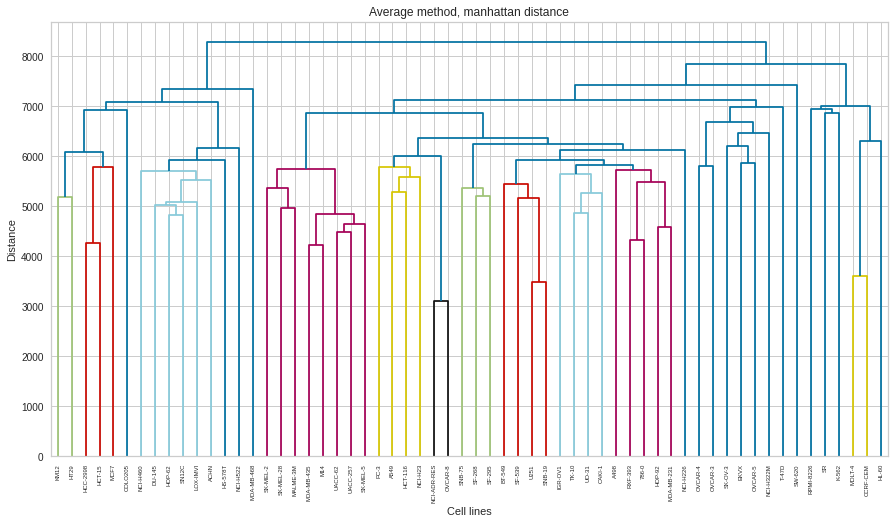

In [21]:
cluster = hierarchy.linkage(df_t, method='average', metric='cityblock', optimal_ordering=True)
# Dendrogram plotting using linkage matrix
plt.figure(figsize=(15,8))
dendrogram = hierarchy.dendrogram(cluster, labels = cell_lines)
plt.title("Average method, manhattan distance")
plt.ylabel("Distance")
plt.xlabel('Cell lines')

In this case, we see a distribution similar to the single method, where most of the genes are classified in the same group while the other ones are classified into smaller ones.

As I commented in the PDF, this method creates clusters at different levels making it difficult to understand the real classification of the data.

#### Ward method

The last method seen in class is Ward's method where he classifies the groups in such a way that the sum of squares within the group is minimised, i.e. groups that result in a smaller increase in the sum of squares are merged.

Text(0.5, 0, 'Cell lines')

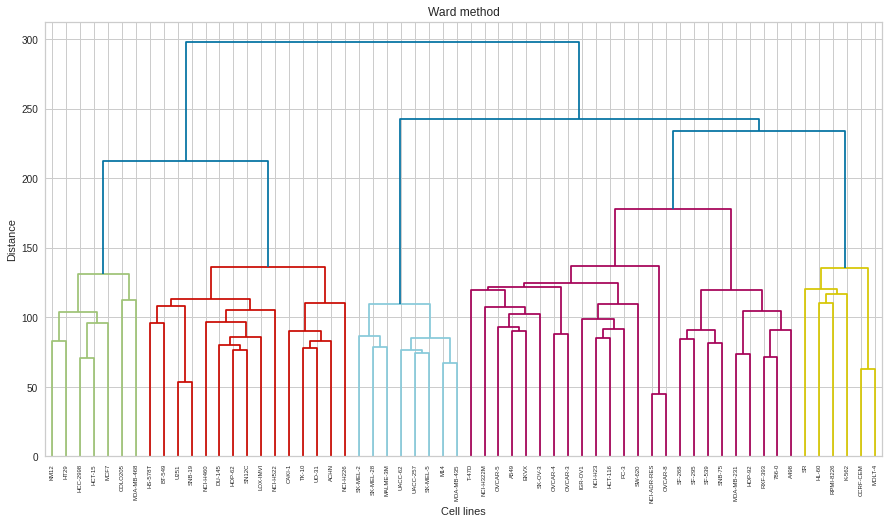

In [13]:
# Ward
cluster = hierarchy.linkage(df_t, method='ward', metric='euclidean', optimal_ordering=True)
plt.figure(figsize=(15,8))
dendrogram = hierarchy.dendrogram(cluster, labels = cell_lines)
plt.title("Ward method")
plt.ylabel("Distance")
plt.xlabel('Cell lines')

This method is the most used (and best) to quantitative variables (the same that we are using). It classifies in a better way the data because it makes 2 large groups and then it creates subgroups between them. We see a better distribution of the clusters than with the other methods.

## **Partitional Clustering**

In this part I will analyze the optimal number of clusters to classify the different cell lines and try to understand the connexion between them.

### Performing some K-means clustering by varying the number of clusters

To start, I will create a loop to store the SSW and score values for each k and print the results. With this data, later, I will be able to do an elbow plot and select the best number of cluster by choosing the one with the lowest difference in SSW value between clusters and the one with the highest Silouhette score.

In [14]:
K = range(2, 10, 1) # Set a range between 2 clusters to 9 
SSW = []
scores = []

for k in K:
  model = KMeans(n_clusters= k, random_state = 42) # Setting number of clusters
  model.fit(df_t)
  label_k = model.predict(df_t)
  score_k = silhouette_score(df_t, label_k)
  SSW.append(model.inertia_)
  scores.append(score_k)
  print('For', k, 'clusters, the SSW is', model.inertia_,
        '\nAnd the Silhouete score is', score_k, '\n')

For 2 clusters, the SSW is 350044.4926600001 
And the Silhouete score is 0.10592698479474807 

For 3 clusters, the SSW is 319569.4965012501 
And the Silhouete score is 0.10545716423873563 

For 4 clusters, the SSW is 294544.4497448833 
And the Silhouete score is 0.12194642870622228 

For 5 clusters, the SSW is 277026.14662874327 
And the Silhouete score is 0.10873902837778296 

For 6 clusters, the SSW is 267113.58551294886 
And the Silhouete score is 0.0851575909045804 

For 7 clusters, the SSW is 255234.48240821442 
And the Silhouete score is 0.07985842512770369 

For 8 clusters, the SSW is 245006.97674878815 
And the Silhouete score is 0.08223364725460675 

For 9 clusters, the SSW is 236420.17700833335 
And the Silhouete score is 0.08345853295935533 



Let's build an elbow plot for SSW and scores to decide:

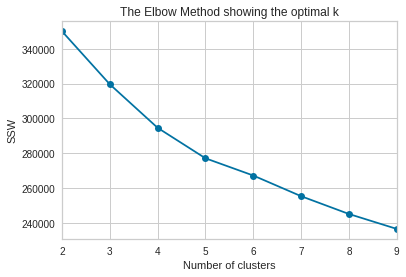

In [15]:
plt.plot(K, SSW, 'bo-')
plt.xlabel('Number of clusters')
plt.xlim([2, 9])
plt.ylabel('SSW')
plt.title('The Elbow Method showing the optimal k')
plt.show()

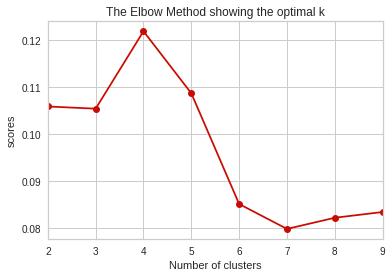

In [16]:
plt.plot(K, scores, 'ro-')
plt.xlim([2, 9])
plt.xlabel('Number of clusters')
plt.ylabel('scores')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Let's visualize the average Silouhette Score and the clusters:

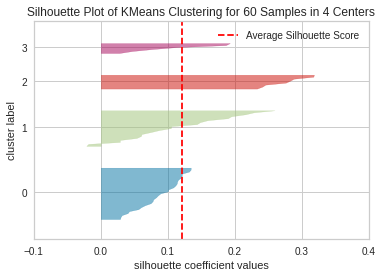

In [17]:
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_t)
visualizer.show()       

By analysing the SSW, the Silouhette score and the average Silouhette Score, I can conclude that the optimal number of clusters for this example is 4, because from 3 to 4 the SSW is still high but from 4 to 5 it isn't, while the silouhette score for 4 is the highest one. Besides, for 4 clusters all of them reach the mean Silouhette score value.

For all of this, I choose as number of clusters 4.